In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")

In [280]:
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


## Data Preprocessing

In [281]:
data = data[['BHK',
             'Bathroom',
             'Furnishing Status',
             'Rent',
             'Size',
             'Floor',
             'Area Type',
             'Tenant Preferred',
             'Point of Contact',
             'Area Locality',
             'City'
             ]]

In [282]:
# Counting different floor representations
floor_df = data[['Floor']]

def floor_feature_count(floor_data):
    # split the string into two, if possible
    try:
        new_floor_data = floor_data.split(' out of ')

        new_floor_data[1] = 'foo' # should throw an exception and weed out non-conforming floors

        try:
            new_floor_data[0] = int(new_floor_data[0])
            new_floor_data[0] = "X"
        except:
            if new_floor_data[0] == 'Ground':
                new_floor_data[0] = 'X'
            if new_floor_data[0] == "Upper Basement" or new_floor_data[0] == 'Lower Basement':
                new_floor_data[0] = 'basement level'

        floor_representation = f"{new_floor_data[0]} out of Y"
    # if not, assume that it's a top-floor apartment (set to 1) 🤷‍♂️
    except:
        floor_representation = "unclear"

    return floor_representation

for index, row in floor_df.iterrows():
    floor_df.at[index, 'Floor'] = floor_feature_count(row['Floor'])

floor_df["Floor"].value_counts()

Floor
X out of Y                 4708
basement level out of Y      34
unclear                       4
Name: count, dtype: int64

In [283]:
def floor_split(floor_data):
    # split the string into two, if possible
    try:
        new_floor_data = floor_data.split(' out of ')

        if (new_floor_data[0] == 'Ground'):
            new_floor_data[0] = 1
        if (new_floor_data[0] == 'Upper Basement'):
            new_floor_data[0] = 2
            new_floor_data[1] = new_floor_data[1] + 2
        if (new_floor_data[0] == 'Lower Basement'):
            new_floor_data[0] = 1
            new_floor_data[1] = new_floor_data[1] + 2

        tuple = (int(new_floor_data[0]),int(new_floor_data[1]))
    # if not, assume that it's a top-floor apartment (set to 1) 🤷‍♂️
    except:
        tuple = (int(new_floor_data[0]),int(new_floor_data[0]))

    return tuple

for index, row in data.iterrows():
    data.at[index, 'Floor'] = floor_split(row['Floor'])

data[['Floor Location', 'Total Floors']] = data['Floor'].apply(lambda x: pd.Series(x))
data = data.drop('Floor', axis=1)

C:\Users\chris\AppData\Local\Temp\ipykernel_18632\2465339074.py:25: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  data[['Floor Location', 'Total Floors']] = data['Floor'].apply(lambda x: pd.Series(x))


In [284]:
data

,BHK,Bathroom,Furnishing Status,Rent,Size,Area Type,Tenant Preferred,Point of Contact,Area Locality,City,Floor Location,Total Floors
0,2,2,Unfurnished,10000,1100,Super Area,Bachelors/Family,Contact Owner,Bandel,Kolkata,1,2
1,2,1,Semi-Furnished,20000,800,Super Area,Bachelors/Family,Contact Owner,"Phool Bagan, Kankurgachi",Kolkata,1,3
2,2,1,Semi-Furnished,17000,1000,Super Area,Bachelors/Family,Contact Owner,Salt Lake City Sector 2,Kolkata,1,3
3,2,1,Unfurnished,10000,800,Super Area,Bachelors/Family,Contact Owner,Dumdum Park,Kolkata,1,2
4,2,1,Unfurnished,7500,850,Carpet Area,Bachelors,Contact Owner,South Dum Dum,Kolkata,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,Semi-Furnished,15000,1000,Carpet Area,Bachelors/Family,Contact Owner,Bandam Kommu,Hyderabad,3,5
4742,3,3,Semi-Furnished,29000,2000,Super Area,Bachelors/Family,Contact Owner,"Manikonda, Hyderabad",Hyderabad,1,4
4743,3,3,Semi-Furnished,35000,1750,Carpet Area,Bachelors/Family,Contact Agent,"Himayath Nagar, NH 7",Hyderabad,3,5
4744,3,2,Semi-Furnished,45000,1500,Carpet Area,Family,Contact Agent,Gachibowli,Hyderabad,23,34


### Conversion of Categorical Variable to One-Hot Encoding

In [285]:
'''
The one-hot encoding function was modified to fix errors with performing it on the Area Locality feature.
'''

def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first=True, prefix=column+suffix)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

data = one_hot_encode(data, 'Furnishing Status')
data = one_hot_encode(data, 'Tenant Preferred')
data = one_hot_encode(data, 'Point of Contact')
data = one_hot_encode(data, 'Area Locality', '')
data = one_hot_encode(data, 'City')
data = one_hot_encode(data, 'Area Type')

### Creating features 

In [286]:
def ratio(data, column1, column2, new_col_name):
    data[new_col_name] = data[column1]/data[column2]
    return data

'''
These ratios increase the model's performance by a lot - 0.15 increase in R2!
But the point is to predict rent prices, and this is pretty much cheating.
'''
#data = ratio(data, 'Rent', 'Size', 'Rent per Square Foot')
#data = ratio(data, 'Rent', 'BHK', 'Rent per Bathroom')
#data = ratio(data, 'Rent', 'Bathroom', 'Rent per BHK')


"\nThese ratios increase the model's performance by a lot - 0.15 increase in R2!\nBut the point is to predict rent prices, and this is pretty much cheating.\n"

### Removing Outliers

C:\Users\chris\AppData\Local\Temp\ipykernel_18632\1622857777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: Futu

<Axes: xlabel='Rent', ylabel='Density'>

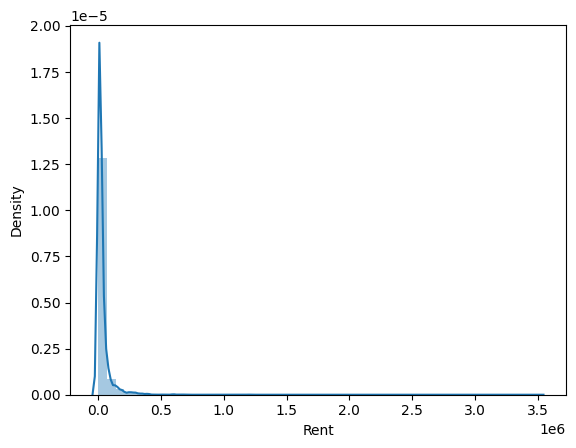

In [287]:
sns.distplot(data['Rent'])

In [288]:

Q1 = data['Rent'].quantile(0.25)
Q3 = data['Rent'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(data['Rent']>=upper)[0]
lower_array = np.where(data['Rent']<=lower)[0]

data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

In [289]:
data

,BHK,Bathroom,Rent,Size,Floor Location,Total Floors,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,...,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Area Type_Carpet Area,Area Type_Super Area
0,2,2,10000,1100,1,2,False,True,True,False,...,False,False,False,False,False,False,True,False,False,True
1,2,1,20000,800,1,3,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True
2,2,1,17000,1000,1,3,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,2,1,10000,800,1,2,False,True,True,False,...,False,False,False,False,False,False,True,False,False,True
4,2,1,7500,850,1,2,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,15000,1000,3,5,True,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4742,3,3,29000,2000,1,4,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4743,3,3,35000,1750,3,5,True,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4744,3,2,45000,1500,23,34,True,False,False,True,...,False,False,False,False,False,True,False,False,True,False


C:\Users\chris\AppData\Local\Temp\ipykernel_18632\1622857777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: Futu

<Axes: xlabel='Rent', ylabel='Density'>

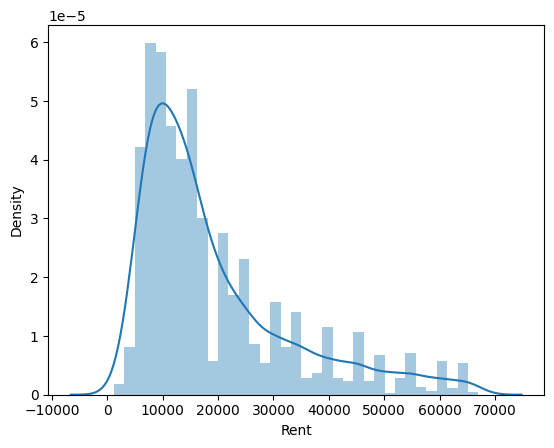

In [290]:
sns.distplot(data['Rent'])

### Training and Test Split

In [291]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

### Standardizing the Values

In [292]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

### Finding Best Penalty Term with Cross-Validation

In [293]:
from sklearn.linear_model import Ridge, LassoCV
from sklearn.model_selection import cross_val_score

# Possible values are pulled from a logarithmic scale (1.e-03 to 1000)
# The optimal value obtained from performing cross-validation was 63.0957344480193
# (code commented out because running it takes way too long)
'''
alphas = np.logspace(-3, 3, 11)
lasso_cv = LassoCV(alphas=alphas).fit(X_train, y_train)
optimal_alpha = lasso_cv.alpha_
'''

model = Ridge(alpha=63.0957344480193)
model.fit(X_train, y_train)

C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526208178.56689453, tolerance: 49968979.32806143
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5666027988.079769, tolerance: 49968979.32806143
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarn

Ridge(alpha=63.0957344480193)

# Evaluation

### Quantitative Evaluation

In [294]:
### Quantitative Evaluation
y_preds = lasso_cv.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", lasso_cv.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [2224.01015436 1625.24287019 3518.33383784 ... 5914.66869434  144.28752943
  -58.3761601 ]
Mean squared error: 46358723.18
Coefficient of determination: 0.76


### Qualitative Evaluation

In [295]:
### Qualitative Evaluation
sample_data = X.iloc[0]
sample_data

sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


10115.434239866996

In [296]:
y.iloc[0]

10000

ValueError: 'sky_blue' is not a valid value for color

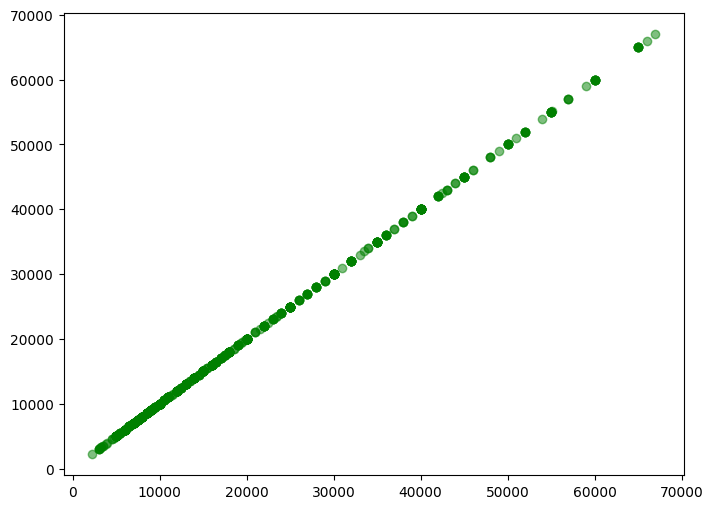

In [300]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='green', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='skyblue', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()